In [1]:
import os
import subprocess
import gzip
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [3]:
chm_num_dict = {}
for process in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment'] :
    chm_num_dict[process] = {}
    for C_class in ['CHM', 'CHnonM', 'CMnonH'] :
        chm_num_dict[process][C_class] = {}
        for t in ['stable', 'stage-specific'] :
            chm_num_dict[process][C_class][t] = pd.read_csv(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/{process}/{t}.{C_class}s.bed').shape[0]
            
pd.DataFrame.from_records(
    [
        (level1, level2, level3, leaf)
        for level1, level2_dict in chm_num_dict.items()
        for level2, level3_dict in level2_dict.items()
        for level3, leaf in level3_dict.items()
    ],
    columns=['process', 'C_class', 'Type', 'number']
)


,process,C_class,Type,number
0,EarlyEmbryogenesis,CHM,stable,10235
1,EarlyEmbryogenesis,CHM,stage-specific,12917
2,EarlyEmbryogenesis,CHnonM,stable,7153
3,EarlyEmbryogenesis,CHnonM,stage-specific,30880
4,EarlyEmbryogenesis,CMnonH,stable,34156
5,EarlyEmbryogenesis,CMnonH,stage-specific,53192
6,PGCsDevelopment,CHM,stable,6260
7,PGCsDevelopment,CHM,stage-specific,6224
8,PGCsDevelopment,CHnonM,stable,6889
9,PGCsDevelopment,CHnonM,stage-specific,14798


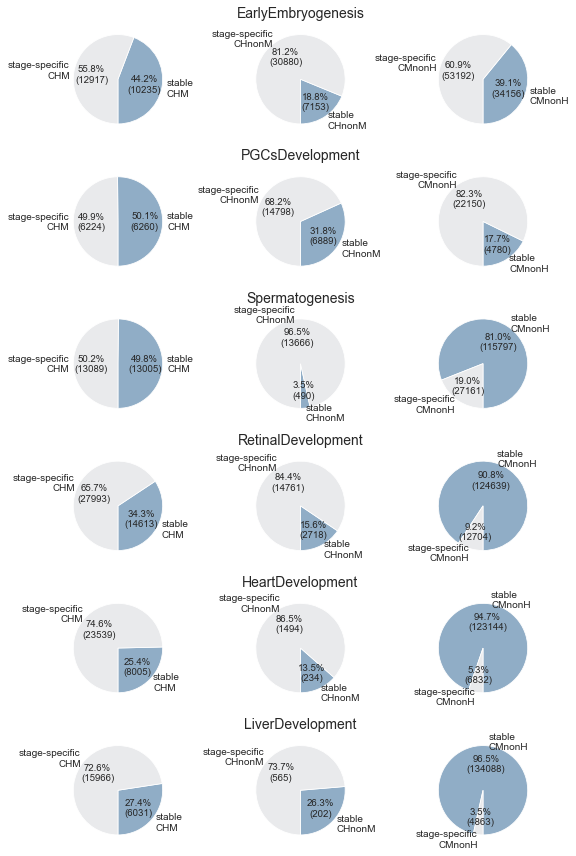

In [14]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(6,3,figsize = (8,12), tight_layout = True)
    for i,process in enumerate(chm_num_dict.keys()) :
        for j,C_class in enumerate(chm_num_dict[process].keys()) :
            sizes = [chm_num_dict[process][C_class]['stable'], chm_num_dict[process][C_class]['stage-specific']]
            ax = axes[i,j]
            ax.pie(sizes, 
                   explode = [0, 0],
                   labels = [f'stable\n{C_class}', f'stage-specific\n{C_class}'],
        #            autopct='%1.1f%%',
                   autopct=lambda pct: func(pct, sizes),
                   shadow = False, 
                   startangle = -90,
                   colors = ['#90ADC6', '#E9EAEC',]
                  )
            if j == 1 :
                ax.set_title(process)
    
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make3_pie_stable_stageSpecific.pdf', transparent = True)